# Requirements

In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import category_encoders as ce
from matplotlib.pyplot import figure
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Data pre-processing

In [13]:
filename = "wustl_iiot_2021.csv"
datIIoT = pd.read_csv(filename)

datIIoT.drop(columns=[ 'StartTime', 'LastTime', 'sIpId', 'dIpId', 'Traffic'],inplace=True)
datIIoT.rename(columns={"Target": "Label"},inplace = True)
datIIoT.rename(columns={"SrcAddr": "IPV4_SRC_ADDR"},inplace = True)
datIIoT.rename(columns={"DstAddr": "IPV4_DST_ADDR"},inplace = True)
datIIoT.rename(columns={"Sport": "L4_SRC_PORT"},inplace = True)
datIIoT.rename(columns={"Dport": "L4_DST_PORT"},inplace = True)


#data0 = datIIoT[datIIoT['Label'] == 0].head(n=100000)
#data1 = datIIoT[datIIoT['Label'] == 1].head(n=100000)
#data = pd.concat([data0, data1], ignore_index=True)
dataPSA=datIIoT


dataPSA['IPV4_SRC_ADDR'] = dataPSA.IPV4_SRC_ADDR.apply(str)
dataPSA['L4_SRC_PORT'] = dataPSA.L4_SRC_PORT.apply(str)
dataPSA['IPV4_DST_ADDR'] = dataPSA.IPV4_DST_ADDR.apply(str)
dataPSA['L4_DST_PORT'] = dataPSA.L4_DST_PORT.apply(str)

#dataPSA["id"]=dataPSA.index.tolist()
#dataPSA["id"]=dataPSA.id.apply(str)


#dataPSA['IPV4_SRC'] = dataPSA['IPV4_SRC_ADDR'].apply(lambda x: int(x.split('.')[0]))##############
#dataPSA['IPV4_DST'] = dataPSA['IPV4_DST_ADDR'].apply(lambda x: int(x.split('.')[0]))##############

dataPSA['IPV4_SRC_ADDR'] = dataPSA['IPV4_SRC_ADDR'] + ':' + dataPSA['L4_SRC_PORT'] # + ':' + dataPSA["id"]
dataPSA['IPV4_DST_ADDR'] = dataPSA['IPV4_DST_ADDR'] + ':' + dataPSA['L4_DST_PORT'] # + ':' + dataPSA["id"]
#dataPSA.drop(columns=['L4_SRC_PORT','L4_DST_PORT'],inplace=True)

Label=dataPSA.Label

dataPSA.drop(columns=['Label'],inplace = True)
#dataPSA.drop(columns=['id'],inplace = True)


cols_to_norm =  list(set(list(dataPSA.iloc[:,:].columns ))  - set(list(['Label','IPV4_DST_ADDR','IPV4_SRC_ADDR',])) )
#cols_to_norm= list([ 'L4_SRC_PORT', 'L4_DST_PORT','PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS','TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS' ])
scaler = StandardScaler()
dataPSA[cols_to_norm] = scaler.fit_transform(dataPSA[cols_to_norm])

data=  dataPSA
data['x'] = data[ cols_to_norm ].values.tolist()
data['y']= Label
#data = data.sample(frac=1)

In [14]:
data

,IPV4_SRC_ADDR,IPV4_DST_ADDR,Mean,L4_SRC_PORT,L4_DST_PORT,SrcPkts,DstPkts,TotPkts,DstBytes,SrcBytes,...,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,x,y
0,192.168.0.20:59034,192.168.0.2:502,-0.187614,0.381524,-0.087517,-0.002973,-0.007808,-0.002994,-0.009447,-0.003961,...,-0.068459,-0.009443,-0.015791,-0.011411,-0.183812,-0.01012,-0.149367,-0.053054,"[-0.002972887274249752, -0.012612884335478195,...",0
1,192.168.0.20:55841,192.168.0.2:502,-0.187614,0.115625,-0.087517,-0.002973,-0.007808,-0.002994,-0.009447,-0.003961,...,-0.068459,-0.009443,-0.015791,-0.009004,-0.184259,-0.01012,-0.149367,-0.053054,"[-0.002972887274249752, -0.013569096719610875,...",0
2,192.168.0.20:63774,192.168.0.2:502,-0.187614,0.776250,-0.087517,-0.002973,-0.007808,-0.002994,-0.009447,-0.003961,...,-0.068459,-0.009443,-0.015791,-0.020270,-0.185373,-0.01012,-0.149367,-0.053054,"[-0.002972887274249752, -0.014127883993516433,...",0
3,209.240.235.92:61771,192.168.0.2:80,-0.187614,0.609449,-0.215415,-0.003087,-0.014840,-0.003260,-0.010124,-0.004045,...,-0.076874,-0.009470,-0.015792,-0.032849,0.866240,-0.01012,0.862614,-0.053054,"[-0.0030868216466100338, -0.11720003831907784,...",1
4,192.168.0.20:0,192.168.0.1:0,4.186104,-4.534563,-0.239661,-0.002897,-0.014840,-0.003070,-0.010124,-0.003914,...,0.090020,-0.009470,-0.015781,-0.032849,4.143108,-0.01012,1.117958,-0.053054,"[-0.0028969310260095636, -0.11720003831907784,...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194459,192.168.0.20:57730,192.168.0.2:502,-0.187614,0.272933,-0.087517,-0.002973,-0.007808,-0.002994,-0.009447,-0.003961,...,-0.068459,-0.009443,-0.015791,-0.010280,-0.182638,-0.01012,-0.149367,-0.053054,"[-0.002972887274249752, -0.010827577988271124,...",0
1194460,192.168.0.20:59930,192.168.0.2:502,-0.187614,0.456139,-0.087517,-0.003049,-0.009566,-0.003108,-0.009610,-0.004013,...,-0.068459,-0.009441,-0.015791,-0.021072,-0.209448,-0.01012,-0.149367,-0.053054,"[-0.0030488435224899396, -0.026946241790308207...",0
1194461,192.168.0.20:64384,192.168.0.2:502,-0.187614,0.827048,-0.087517,-0.002973,-0.007808,-0.002994,-0.009447,-0.003961,...,-0.068459,-0.009443,-0.015791,-0.020671,-0.184166,-0.01012,-0.149367,-0.053054,"[-0.002972887274249752, -0.012152944978414243,...",0
1194462,192.168.0.20:53833,192.168.0.2:502,-0.187614,-0.051592,-0.087517,-0.002973,-0.007808,-0.002994,-0.009447,-0.003961,...,-0.068459,-0.009443,-0.015791,-0.020525,-0.185386,-0.01012,-0.149367,-0.053054,"[-0.002972887274249752, -0.014121840149458114,...",0


In [15]:
print(data.shape)

(1194464, 45)


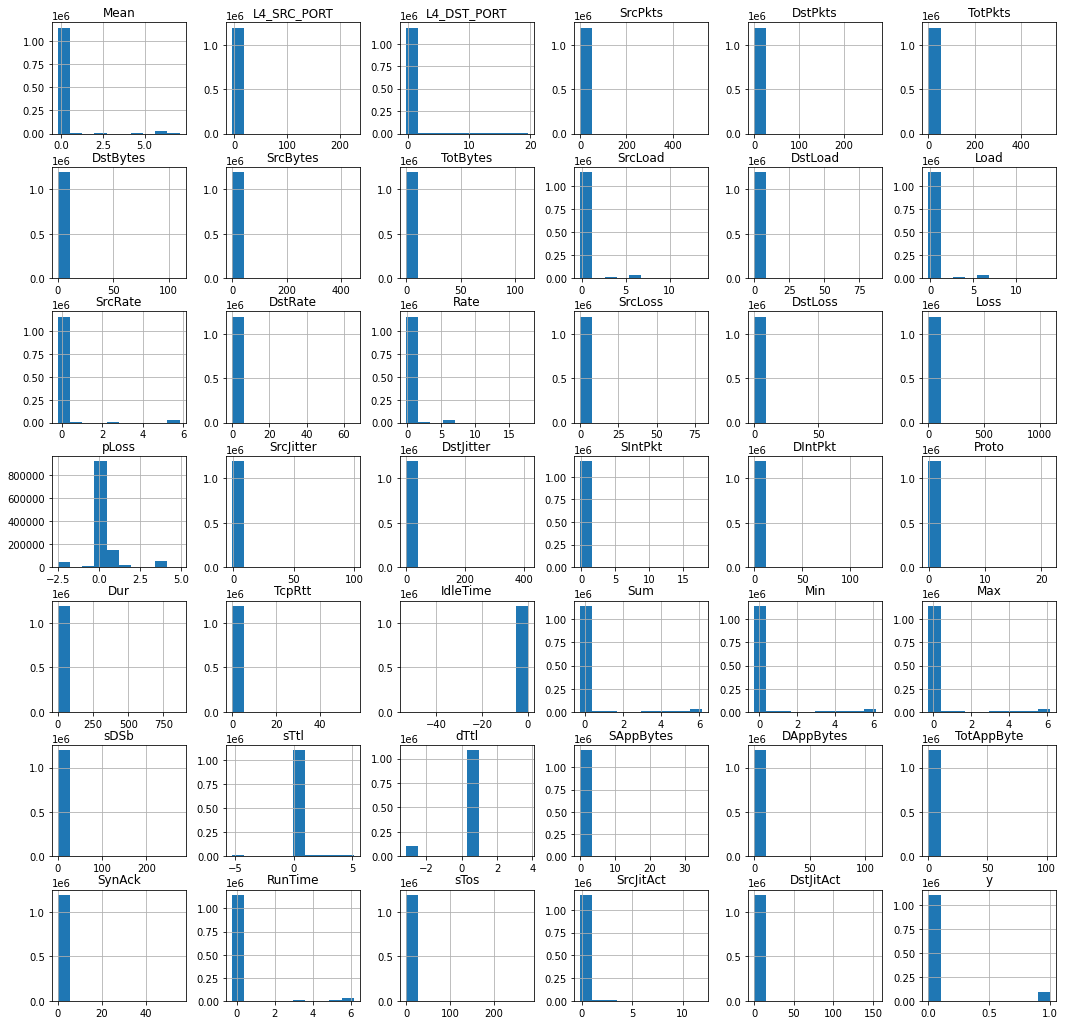

In [16]:
# print histogram for each parameter

data.hist(figsize=(18,18))



plt.show()    

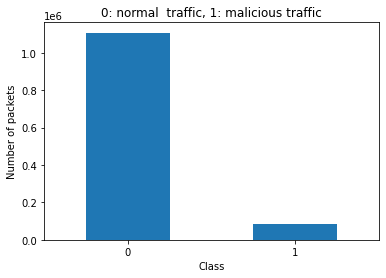

In [18]:
count_classes = pd.value_counts(data['y'], sort = True)
count_classes.plot(kind = 'bar', rot=0)


plt.xticks(range(len(data['y'].unique())), data.y.unique())
plt.title("0: normal  traffic, 1: malicious traffic")
plt.xlabel("Class")
plt.ylabel("Number of packets");

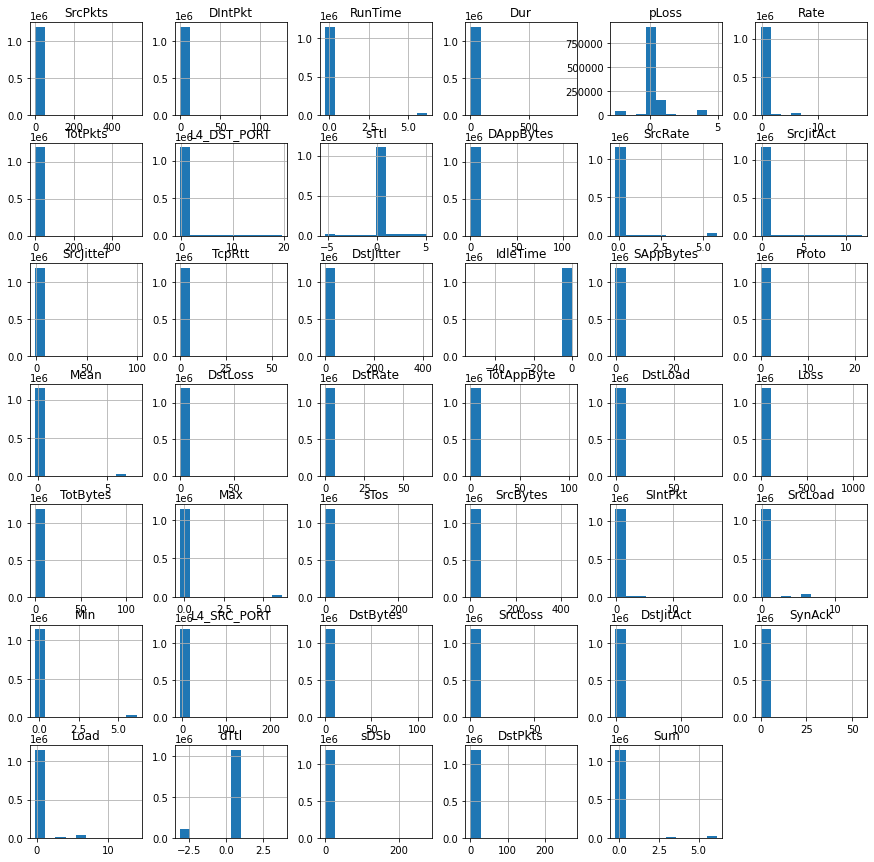

In [19]:
data[cols_to_norm].hist(figsize=(17,17))
plt.show()

In [20]:
import seaborn as sns

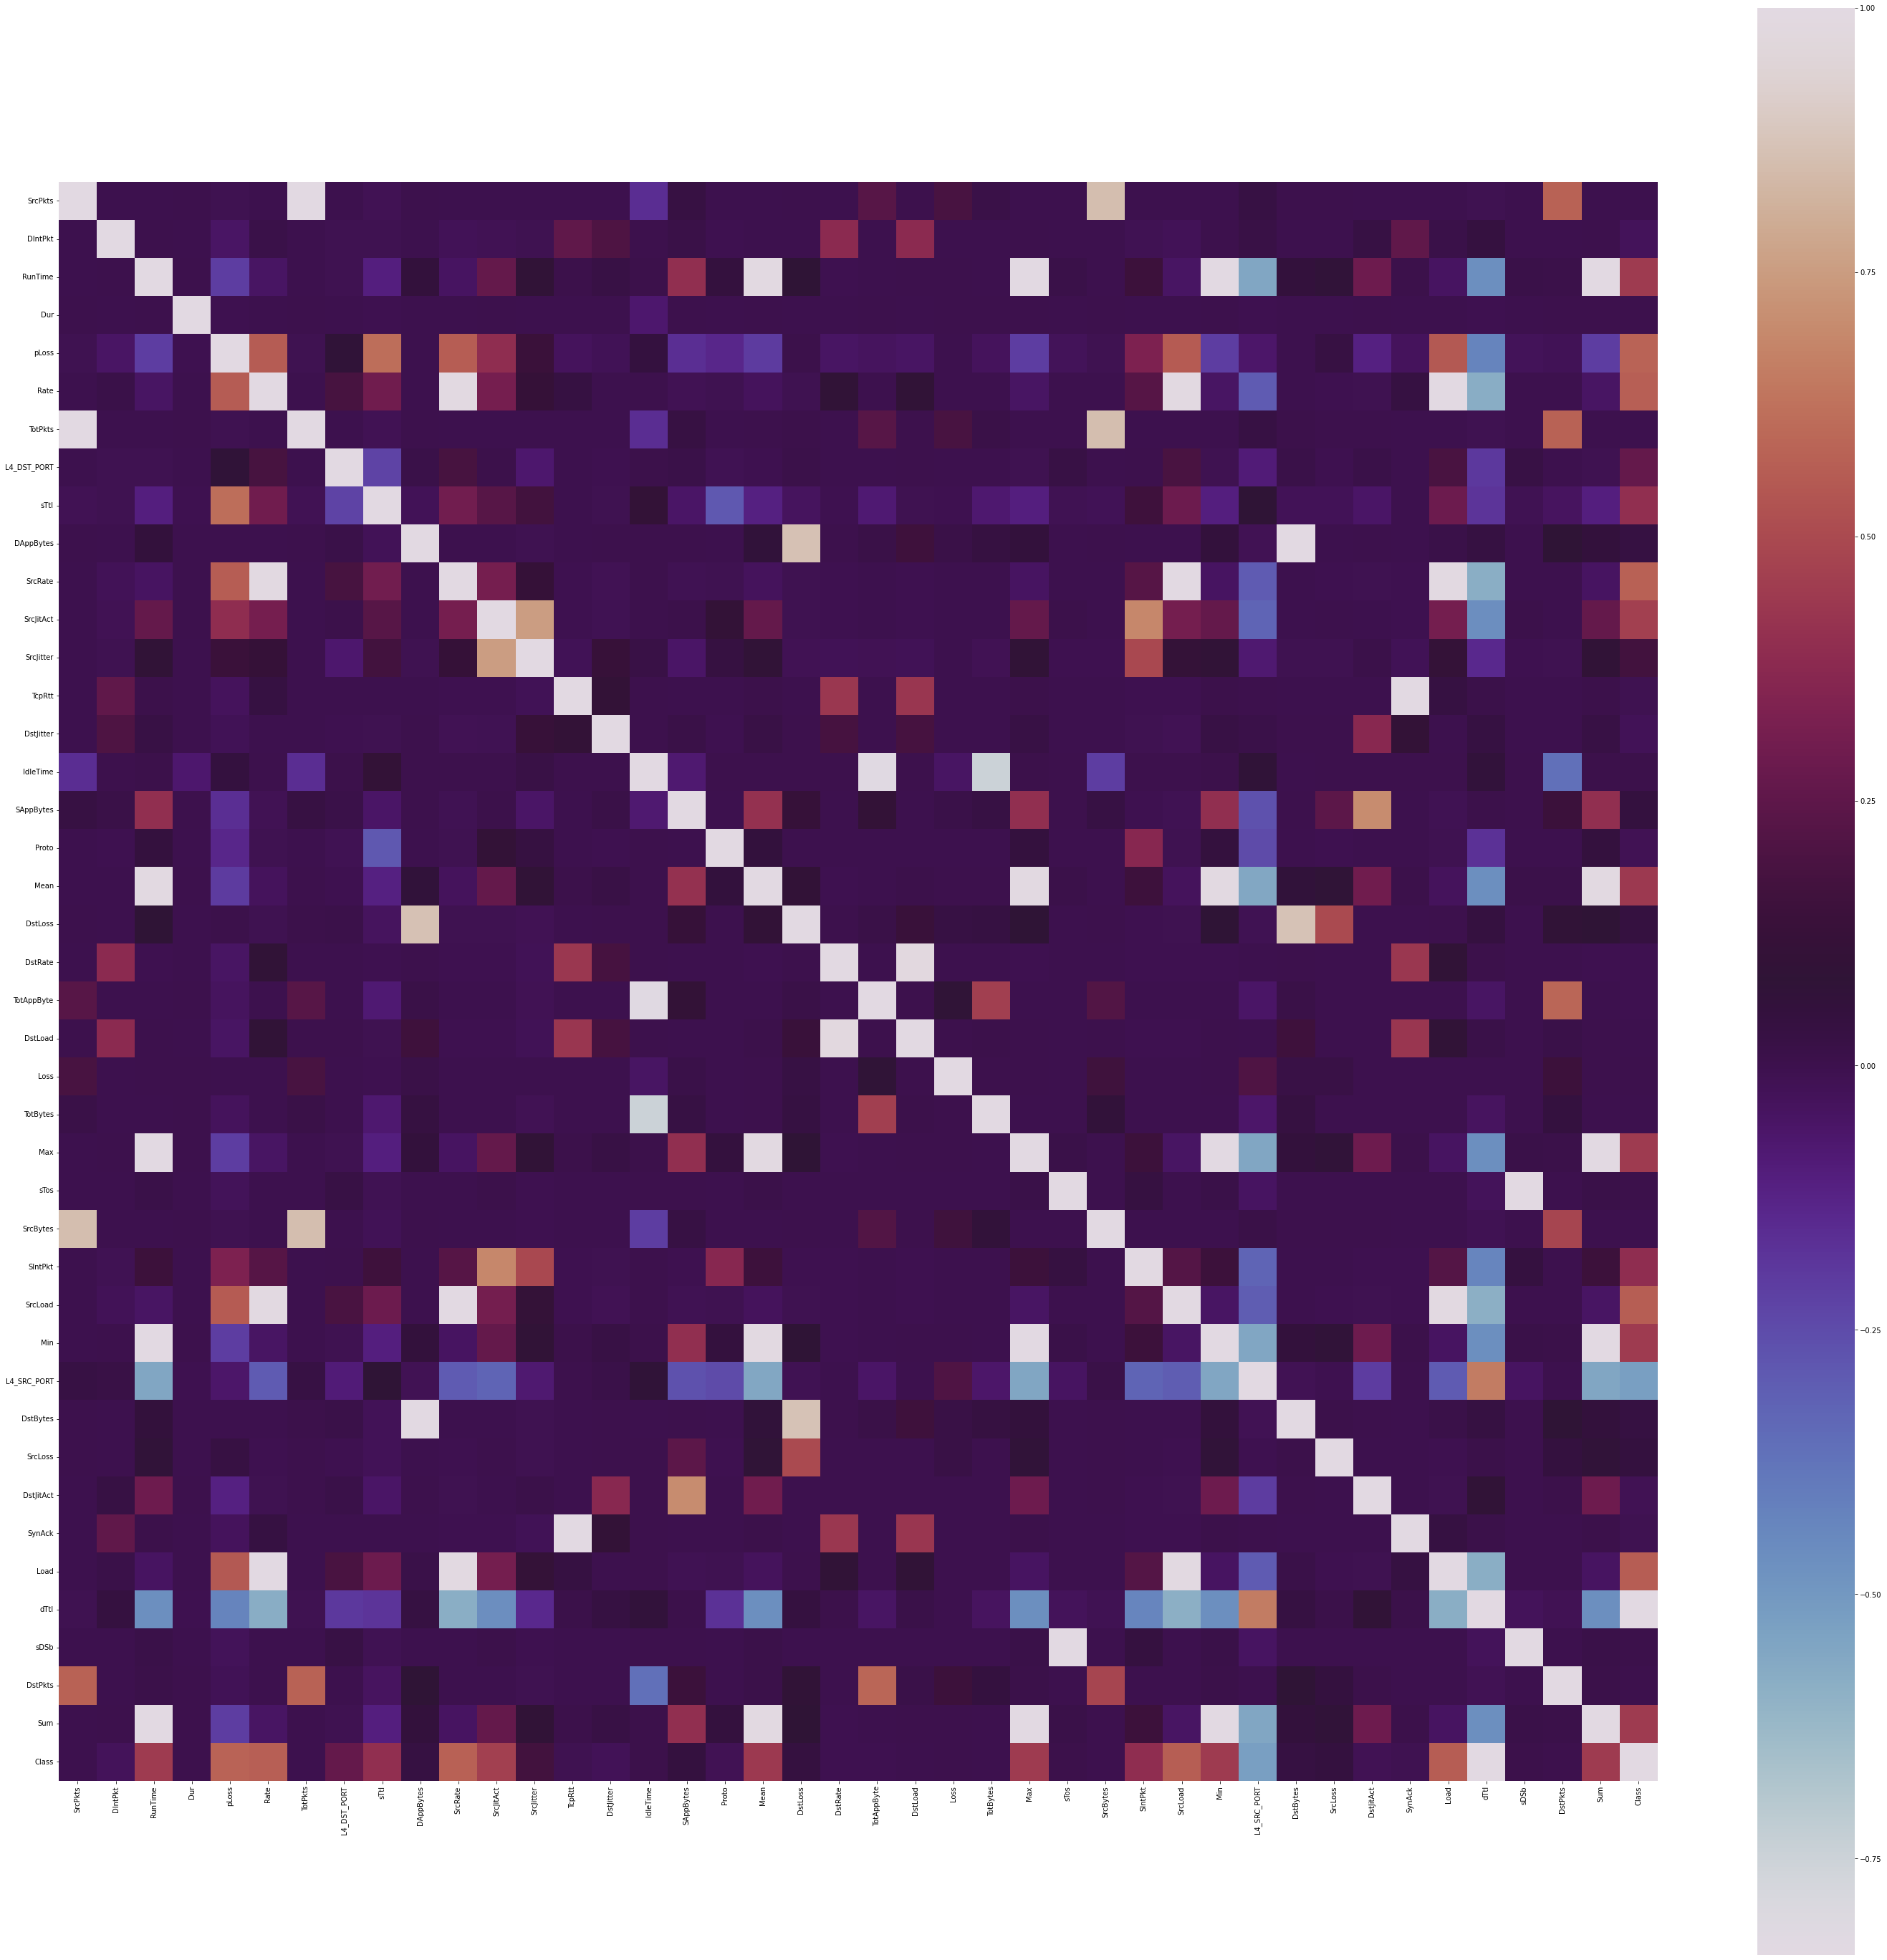

In [21]:
XstdY = data[cols_to_norm].copy()
XstdY['Class'] = data['y']
cormat = XstdY.corr()
fig = plt.figure(figsize=(50,50))

sns.heatmap(cormat, square=True, cmap=plt.cm.twilight)
plt.show()

<AxesSubplot:>

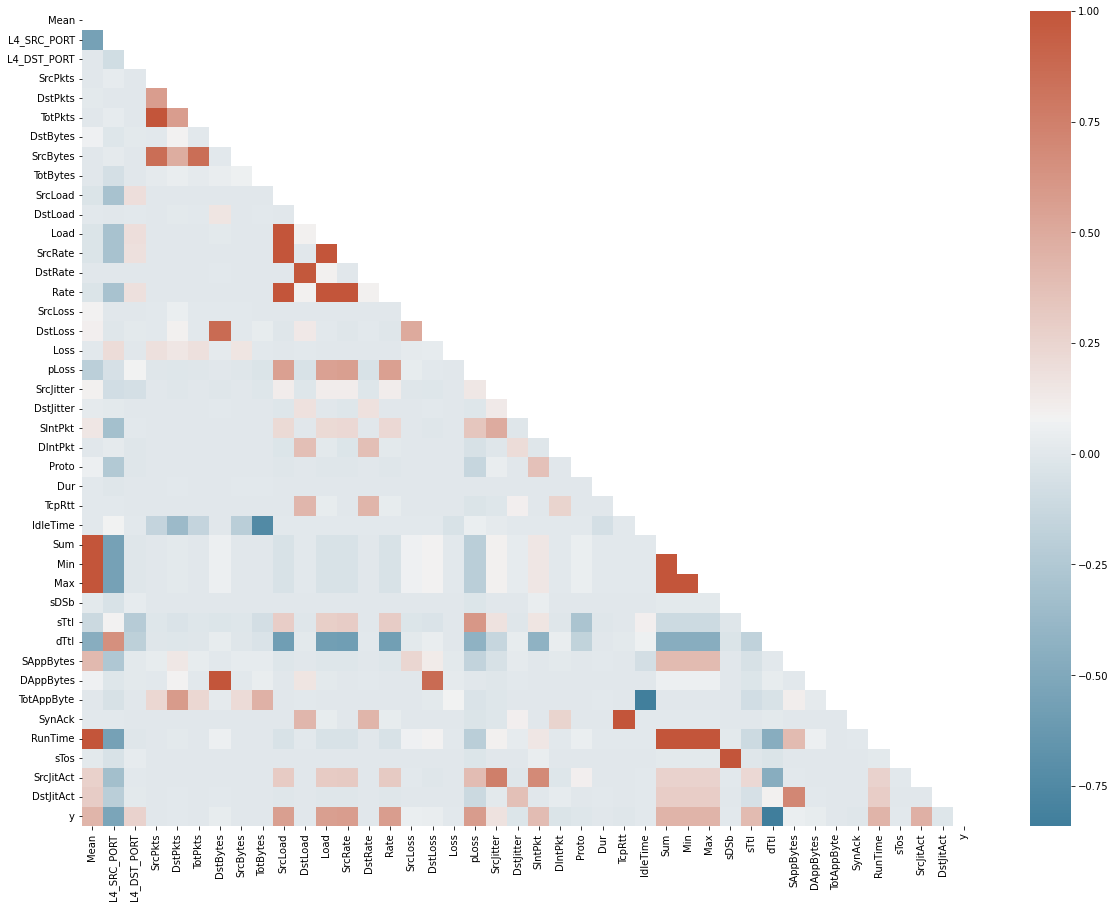

In [24]:

# Correlation between different variables
#
corr = data.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(20, 15))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=False, mask = mask, cmap=cmap)
